In [1]:
# Installing library
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install nltk
!pip install setuptools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 533.9 kB/s eta 0:00:001m741.5 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 433.1 kB/s eta 0:00:00 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.9/589.9 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.6 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [45]:
import tensorflow
from tensorflow import keras
from keras import Model
from keras.layers import Embedding, LSTM, Dense, Dropout, Input, Add, Flatten, Dropout, PReLU, Attention
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import pad_sequences
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('data.csv')
df

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [3]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [4]:

df['Length'] = [len(x) for x in df['Comment']]
df

,Comment,Emotion,Length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

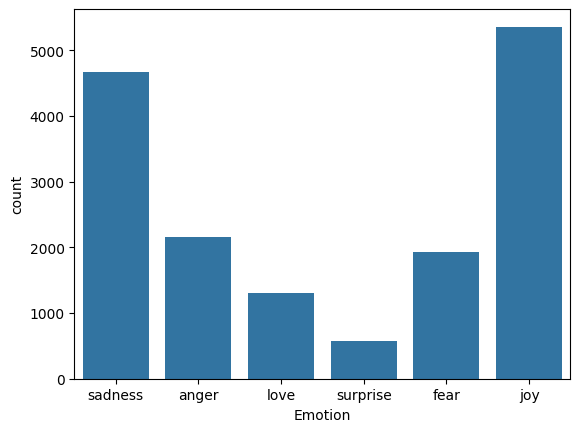

In [8]:
sns.countplot(x = df['Emotion'])
plt.show()

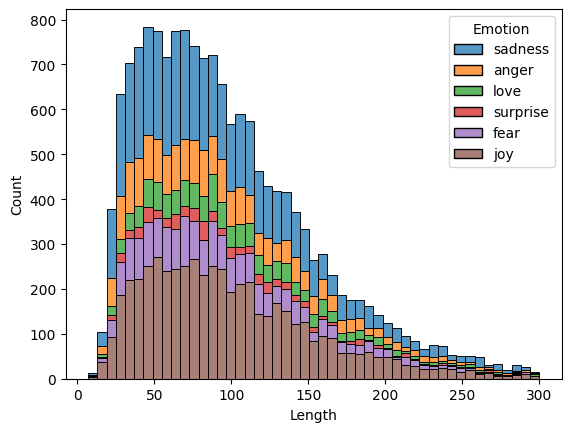

In [9]:
# data distribution
sns.histplot(data=df, x='Length', hue='Emotion', multiple='stack')

plt.show()

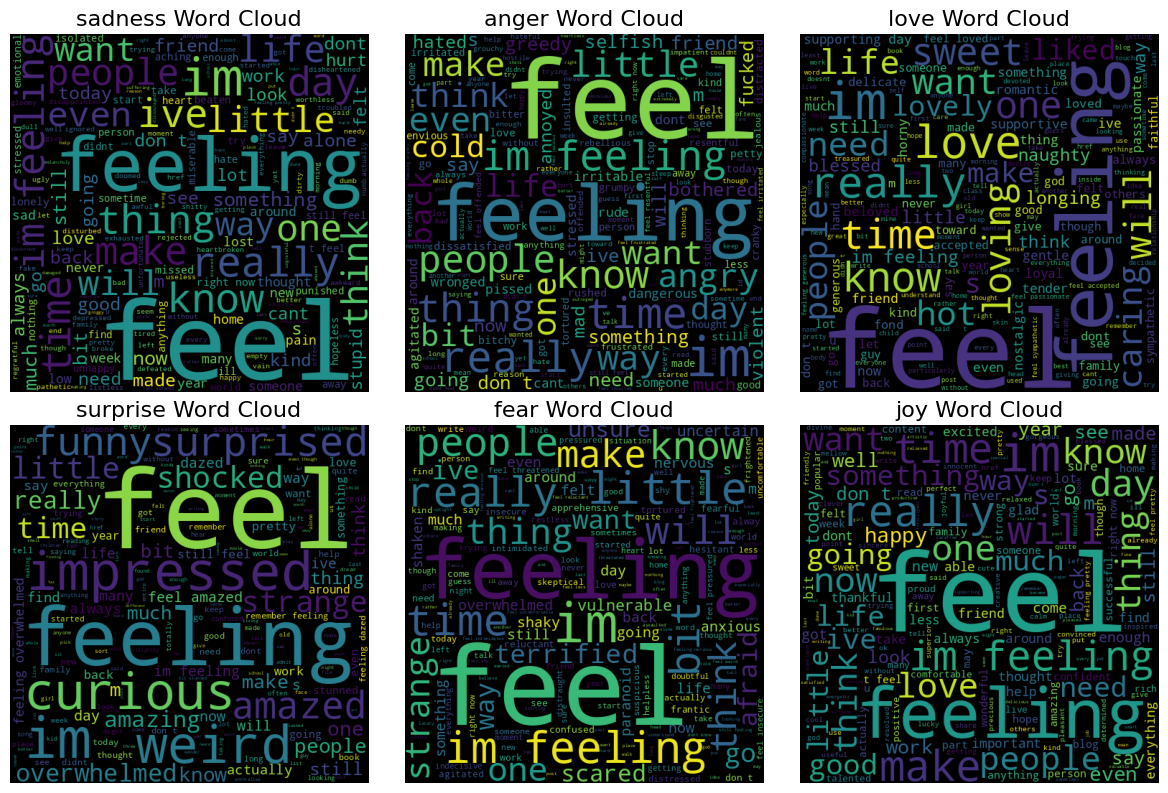

In [10]:
def words_cloud(wordcloud, em, ax):
    ax.set_title(em+' Word Cloud', size=16)
    ax.imshow(wordcloud)
    ax.axis("off")

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

emotions_list = df['Emotion'].unique()
for idx, emotion in enumerate(emotions_list):
    text = ' '.join([sentence for sentence in df.loc[df['Emotion'] == emotion, 'Comment']])
    wordcloud = WordCloud(width=500, height=500).generate(text)
    row = idx // 3
    col = idx % 3
    words_cloud(wordcloud, emotion, axes[row, col])

plt.tight_layout()
plt.show()

# Encoding

In [11]:
df.columns

Index(['Comment', 'Emotion', 'Length'], dtype='object')

In [12]:
labels = df['Emotion']
features = df['Comment']

In [13]:
le = LabelEncoder()
labels = le.fit_transform(labels)
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

In [14]:
for i in range(len(np.unique(labels))):
    print(i, '==>', le.inverse_transform(np.array([i])))

0 ==> ['anger']
1 ==> ['fear']
2 ==> ['joy']
3 ==> ['love']
4 ==> ['sadness']
5 ==> ['surprise']


# Cleaning

In [15]:
# nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

In [16]:
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

features = features.apply(clean_text)

In [17]:
features

0                                        didnt feel humili
1        go feel hopeless damn hope around someon care ...
2                     im grab minut post feel greedi wrong
3           ever feel nostalg fireplac know still properti
4                                             feel grouchi
                               ...                        
15995        brief time beanbag said anna feel like beaten
15996     turn feel pathet still wait tabl sub teach degre
15997                              feel strong good overal
15998                       feel like rude comment im glad
15999                         know lot feel stupid portray
Name: Comment, Length: 15999, dtype: object

In [18]:
cnt = 0
my_list = []
for text in features:
    text = text.split()
    for t in text:
        my_list.append(t)
print(len(my_list))
print(len(list(set(my_list))))

149640
10377


In [19]:
features.head(5)

0                                    didnt feel humili
1    go feel hopeless damn hope around someon care ...
2                 im grab minut post feel greedi wrong
3       ever feel nostalg fireplac know still properti
4                                         feel grouchi
Name: Comment, dtype: object

In [20]:
vocab_size = 12000
one_hot_word = [one_hot(input_text=s, n=vocab_size) for s in features]

In [21]:
print(one_hot_word[0])
print(one_hot_word[1])

[1494, 3934, 9363]
[5615, 3934, 7414, 11413, 4605, 8170, 9244, 10418, 6568]


In [22]:
l = 0
for li in one_hot_word:
    if len(li) > l:
        l = len(li)
print(l)

35


In [23]:
features = pad_sequences(sequences=one_hot_word, maxlen=40)

In [24]:
features[0], labels

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 1494, 3934, 9363], dtype=int32),
 array([4, 4, 0, ..., 2, 0, 4]))

# Train Test Split

In [25]:
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.4,shuffle=True,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,shuffle=True,random_state=42)

In [26]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(9599, 40) (9599,)
(3200, 40) (3200,)
(3200, 40) (3200,)


In [27]:
item, count = np.unique(y_test, return_counts=True)
for i in range(len(item)):
    print(item[i],' ',le.inverse_transform(np.array([i])),' ',count[i])

0   ['anger']   426
1   ['fear']   386
2   ['joy']   1053
3   ['love']   266
4   ['sadness']   962
5   ['surprise']   107


In [28]:
item, count = np.unique(y_val, return_counts=True)
for i in range(len(item)):
    print(item[i],' ',le.inverse_transform(np.array([i])),' ',count[i])

0   ['anger']   427
1   ['fear']   344
2   ['joy']   1085
3   ['love']   299
4   ['sadness']   931
5   ['surprise']   114


In [29]:
item, count = np.unique(y_train, return_counts=True)
for i in range(len(item)):
    print(item[i],' ',le.inverse_transform(np.array([i])),' ',count[i])

0   ['anger']   1306
1   ['fear']   1207
2   ['joy']   3223
3   ['love']   739
4   ['sadness']   2773
5   ['surprise']   351


In [30]:
# Categorical i.e. onehotencoding
y_train= to_categorical(y_train)
y_val= to_categorical(y_val)

# Model Building

In [65]:
inputs = Input(shape=(40,))

x = Embedding(input_dim=12000, output_dim=150)(inputs)
x = LSTM(64, return_sequences=True)(x)
x = Dropout(0.1)(x)

# x = Attention()([x,x])

x = LSTM(32, return_sequences=True)(x)
x = Dropout(0.1)(x)

x = Flatten()(x)
x = PReLU()(x)
x = Dense(32)(x)
x = Dense(16)(x)
outputs = Dense(6, activation='sigmoid')(x)
model = Model(inputs, outputs)

In [66]:
# TF callback that stops training when best value of validationi loss function is reached. It also restores weights from the best training iteration.
early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [67]:
model.compile(loss = "binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=256, validation_data=(X_val,y_val), callbacks=[early_stop_callback])

Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.2491 - loss: 0.4903 - val_accuracy: 0.2909 - val_loss: 0.4098
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.3293 - loss: 0.4094 - val_accuracy: 0.3391 - val_loss: 0.4071
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.3340 - loss: 0.4080 - val_accuracy: 0.3284 - val_loss: 0.4036
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.3757 - loss: 0.3912 - val_accuracy: 0.5272 - val_loss: 0.3569
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.6064 - loss: 0.3127 - val_accuracy: 0.6284 - val_loss: 0.2928
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.6965 - loss: 0.2383 - val_accuracy: 0.6525 - val_loss: 0.2869
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7727 - loss: 0.1910 - val_accuracy: 0.7219 - val_loss: 0.2498
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8612 - loss: 0.1399 - val_accuracy: 0.

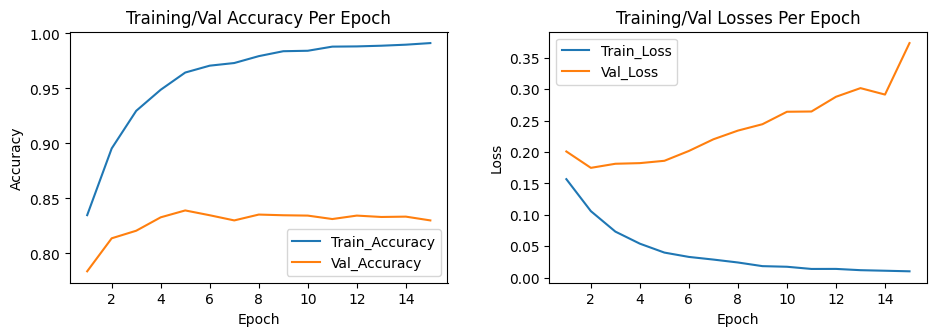

In [62]:
# plotting loss graphs w.r.t each epoch
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 4))

ax1.plot([None] + model.history.history["accuracy"])
ax1.plot([None] + model.history.history["val_accuracy"])
ax1.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
ax1.set_title('Training/Val Accuracy Per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')

ax2.plot([None] + model.history.history["loss"])
ax2.plot([None] + model.history.history["val_loss"])
ax2.legend(['Train_Loss', 'Val_Loss'], loc = 0)
ax2.set_title('Training/Val Losses Per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
fig.tight_layout(pad=3)
plt.show()

In [63]:
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [64]:
print('        ----------Classification Report Of Classes-------------')
print(classification_report(y_test,y_pred))
print('\n        ----------Validation Data------------------')
print('Accuarcy:',accuracy_score(y_test, y_pred)* 100)
print('Precision: {:,.4f}'.format(precision_score(y_test, y_pred, average='weighted') * 100))
print('Recall-score: {:,.4f}'.format(recall_score(y_test, y_pred, average='weighted') * 100))
print('F1-score: {:,.4f}'.format(f1_score(y_test, y_pred, average='weighted') * 100))

        ----------Classification Report Of Classes-------------
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       426
           1       0.82      0.79      0.80       386
           2       0.81      0.92      0.86      1053
           3       0.75      0.55      0.63       266
           4       0.92      0.85      0.89       962
           5       0.70      0.70      0.70       107

    accuracy                           0.84      3200
   macro avg       0.81      0.78      0.79      3200
weighted avg       0.84      0.84      0.84      3200


        ----------Validation Data------------------
Accuarcy: 83.75
Precision: 83.8761
Recall-score: 83.7500
F1-score: 83.5072


In [40]:
cm = confusion_matrix(y_test, y_pred)

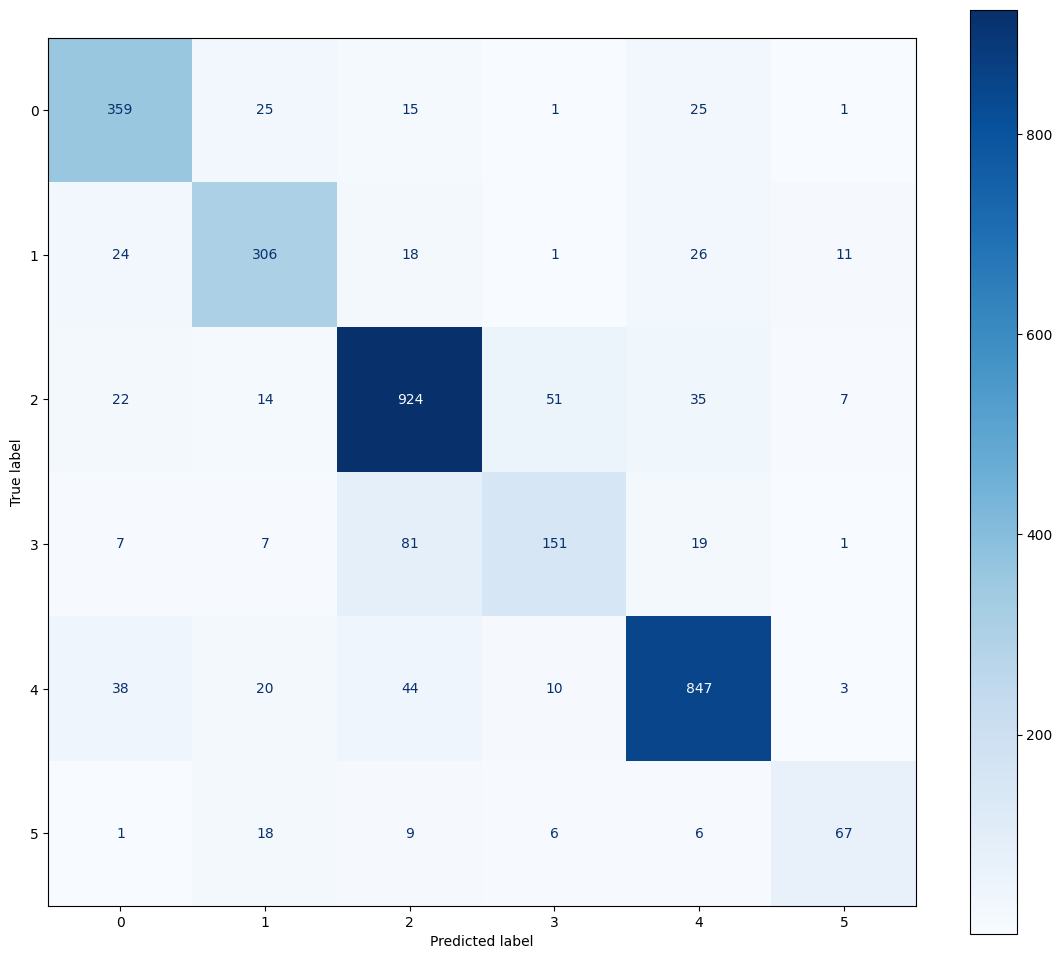

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(14,12))
disp.plot(ax=ax, cmap=plt.cm.Blues)